# Clustering

## 2. Agglomerative

Kode program di bawah adalah kode program yang mengimplementasikan metode Hierarchy/Agglomerative Clustering. Metode tersebut diimplementasikan dengan bantuan modul `scipy.cluster`.

In [5]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import numpy as np

Di sini kita menggunakan data dummy dengan panjang 15 data. Data tersebut disimpan di dalam objek `X` dengan tipe data `numpy array`.

In [65]:
X = np.array([662, 877, 255, 412, 996, 295, 468, 268,
              400, 754, 564, 138, 219, 869, 669])

Aggloromerative clustering diimplementasikan dengan kelas `hierarchy`. Jika berdasarkan slide presentasi di materi Hierarchical Clusterring, terdapat beberapa jenis metode perhitungan kemiripan (similarities) yaitu, **Min**, **Max**, **Group Average**, dan **Distance between Centroids**. 

<img src="img/intercluster-similarities.jpg" width=500 height=500>

Scipy sudah memfasilitasi metode tersebut pada fungsi `linkage` namun dengan nama yang berbeda:
- Min --> `single`
- Max --> `complete`
- Group Average --> `average`
- Distance between Centroids --> `centroid`

Contoh:
`hierarchy.linkage(data, method='single')`

In [69]:
Z = hierarchy.linkage(X, 'single')
Z

array([[  2.,   5., 138.,   2.],
       [  3.,   4., 219.,   2.],
       [  0.,   7., 255.,   3.],
       [  1.,   8., 268.,   4.],
       [  6.,   9., 295.,   6.]])

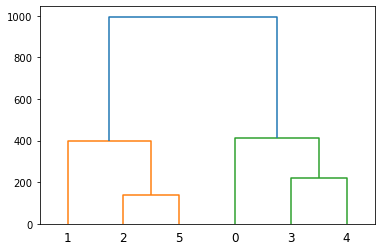

In [68]:
plt.figure()
plot_dendogram = hierarchy.dendrogram(Z)

Teknik perhitungan intercluster similarities juga diimplementasikan dengan kelas-kelas tersendiri pada modul `scipy.cluster.hierarchy`. Berikut contoh-contoh implementasinya:

### 2.1 Single Linkage

In [12]:
from scipy.cluster.hierarchy import single, fcluster
from scipy.spatial.distance import pdist

In [29]:
X = [[1, 1], [1.5, 1.5], 
     [5, 5], [3, 4],
     [4, 5], [3, 3.5]
    ]
X

[[1, 1], [1.5, 1.5], [5, 5], [3, 4], [4, 5], [3, 3.5]]

In [31]:
y = pdist(X, metric='euclidean')
y

array([0.70710678, 5.65685425, 3.60555128, 5.        , 3.20156212,
       4.94974747, 2.91547595, 4.30116263, 2.5       , 2.23606798,
       1.        , 2.5       , 1.41421356, 0.5       , 1.80277564])

In [32]:
Z = single(y)
Z

array([[3.        , 5.        , 0.5       , 2.        ],
       [0.        , 1.        , 0.70710678, 2.        ],
       [2.        , 4.        , 1.        , 2.        ],
       [6.        , 8.        , 1.41421356, 4.        ],
       [7.        , 9.        , 2.5       , 6.        ]])

In [43]:
fcluster(Z, 0.9, criterion='distance')

array([1, 1, 3, 2, 4, 2], dtype=int32)

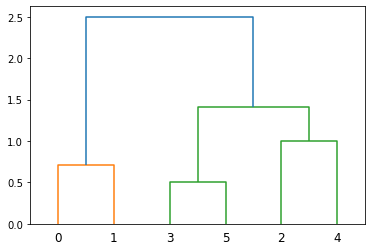

In [33]:
plt.figure()
plot_dendogram = hierarchy.dendrogram(Z)

### 2.2 Max/Complete

In [40]:
from scipy.cluster.hierarchy import complete, fcluster
from scipy.spatial.distance import pdist

In [36]:
X = [[1, 1], [1.5, 1.5], 
     [5, 5], [3, 4],
     [4, 5], [3, 3.5]
    ]
X

[[1, 1], [1.5, 1.5], [5, 5], [3, 4], [4, 5], [3, 3.5]]

In [38]:
distance_metric = ['euclidean', 'mahalanobis', 'minkowski', 'chebyshev']
y = pdist(X, metric=distance_metric[0])
y

array([0.70710678, 5.65685425, 3.60555128, 5.        , 3.20156212,
       4.94974747, 2.91547595, 4.30116263, 2.5       , 2.23606798,
       1.        , 2.5       , 1.41421356, 0.5       , 1.80277564])

In [41]:
Z = complete(y)
Z

array([[3.        , 5.        , 0.5       , 2.        ],
       [0.        , 1.        , 0.70710678, 2.        ],
       [2.        , 4.        , 1.        , 2.        ],
       [6.        , 8.        , 2.5       , 4.        ],
       [7.        , 9.        , 5.65685425, 6.        ]])

In [44]:
fcluster(Z, 0.9, criterion='distance')

array([1, 1, 3, 2, 4, 2], dtype=int32)

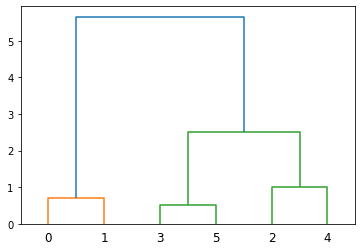

In [45]:
plt.figure()
plot_dendogram = hierarchy.dendrogram(Z)

### 2.3 Average

In [46]:
from scipy.cluster.hierarchy import average, fcluster
from scipy.spatial.distance import pdist

In [47]:
X = [[1, 1], [1.5, 1.5], 
     [5, 5], [3, 4],
     [4, 5], [3, 3.5]
    ]
X

[[1, 1], [1.5, 1.5], [5, 5], [3, 4], [4, 5], [3, 3.5]]

In [48]:
distance_metric = ['euclidean', 'mahalanobis', 'minkowski', 'chebyshev']
y = pdist(X, metric=distance_metric[0])
y

array([0.70710678, 5.65685425, 3.60555128, 5.        , 3.20156212,
       4.94974747, 2.91547595, 4.30116263, 2.5       , 2.23606798,
       1.        , 2.5       , 1.41421356, 0.5       , 1.80277564])

In [50]:
Z = average(y)
Z

array([[3.        , 5.        , 0.5       , 2.        ],
       [0.        , 1.        , 0.70710678, 2.        ],
       [2.        , 4.        , 1.        , 2.        ],
       [6.        , 8.        , 1.98826429, 4.        ],
       [7.        , 9.        , 4.01629421, 6.        ]])

In [51]:
fcluster(Z, 0.9, criterion='distance')

array([1, 1, 3, 2, 4, 2], dtype=int32)

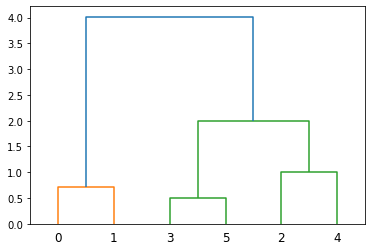

In [52]:
plt.figure()
plot_dendogram = hierarchy.dendrogram(Z)

## Studi Kasus

Di bagian ini kita akan mencoba mengimplementasikan **Agglomerative Clustering** pada dataset Mall Customers.

In [53]:
import pandas as pd
import seaborn as sns

In [54]:
df = pd.read_csv('../../Datasets/Mall_Customers.csv')
df.head() # Preview sebagian data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


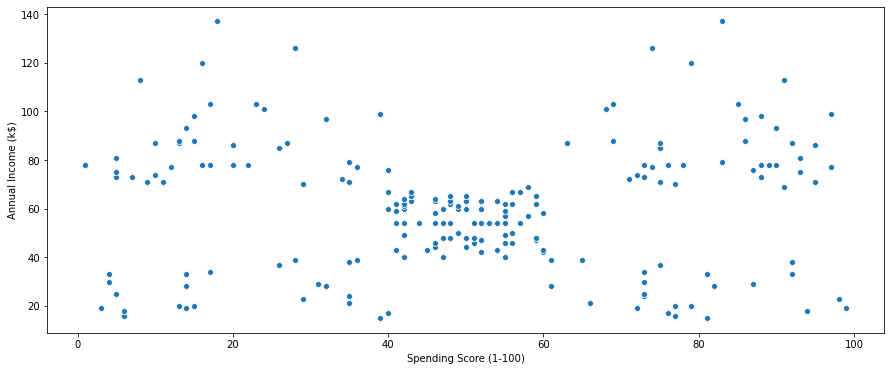

In [56]:
plt.figure(1, figsize=(15, 6))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df)

## Proses Clustering

Proses clustering dilakukan dengan menggunakan kelas `hierarchy` pada modul `scipy.cluster`. Keterangan lebih lengkap mengenai kelas `hierarchy` dapat langsung klik [dokumentasi resmi](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) dari Scikit-Learn langsung.

In [58]:
# Ambil data pada atribut Spending Score dan Annual Income
X = df[['Spending Score (1-100)', 'Annual Income (k$)']].values

In [59]:
y = pdist(X, metric='euclidean')

In [60]:
Z = single(y)
fcluster(Z, 0.9, criterion='distance')

array([ 63,  49,  39,  45,  64,  46,  40,   5,  41,  50,  36,   3,  37,
        47,  38,  48,  67,  56,  69,   4,  68,  51,  44,  52,  35,  59,
        65,  62,  66,  61,  42,  55,  43,  57,  33,  60,  34,  53,  70,
        54,  78,  58,  79, 154,  71, 155, 150, 151, 129, 129, 148, 152,
       149, 153, 137, 130, 146, 138, 145, 139, 133, 134, 144, 132, 142,
       131, 143, 140, 131, 141, 135, 156, 147, 136, 117, 124, 123, 118,
       121, 115, 122, 125, 116, 120, 126, 119, 111, 113, 112, 110, 114,
        89,  98,  90,  86, 106, 107, 100,  84,  99,  87,  96, 127, 101,
       102,  85, 105,  94,  88,  97, 104, 103,  91,  95, 108, 109,  92,
        83,  93,  80,  81, 128,  82, 186,  77, 177,  75, 185,  13, 176,
        14, 176,  76, 175,  15, 182,  16, 173,  18, 174,  17, 183,  74,
       181,  19, 187,  72, 169,  11, 180,   9, 178,  12, 171,  10, 179,
         8, 172,   8, 170,  73, 188,  20, 184,  21, 159,  31, 167,  22,
       162,  25, 160,  28, 168,  26, 189,  27, 161,  29, 165,   

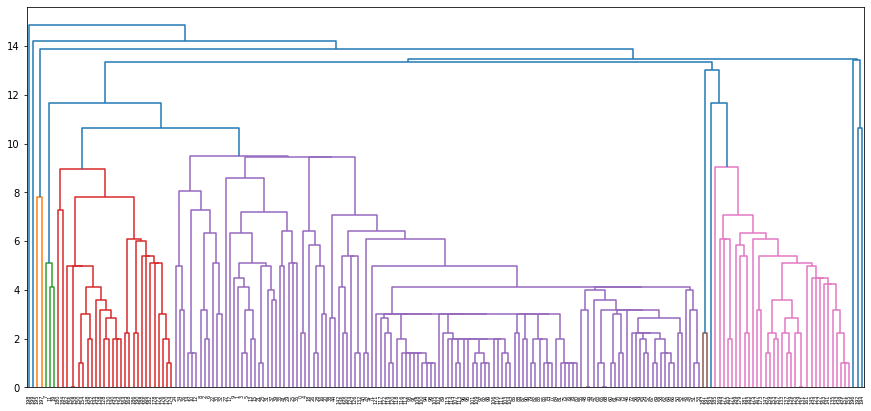

In [63]:
plt.figure(figsize=(15, 7))
plot_dendogram = hierarchy.dendrogram(Z)